In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [1]:
file_train_text = "../../data/training_text/training_text"
file_train_variant = "../../data/training_variants/training_variants"

In [3]:
train_text = pd.read_csv(file_train_text, sep = '\|\|')
train_text.index.name = "ID"
train_text.columns = ["Text"]

train_variant = pd.read_csv(file_train_variant)
train_variant.set_index("ID",inplace = True)

/home/ragou/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [4]:
train_variant[train_variant["Variation"].isin(["C396R", "H398Q", "Y371H", "K382E", "C381A"])]

,Gene,Variation,Class
ID,,,
8,CBL,Y371H,4
11,CBL,K382E,4
13,CBL,C381A,4
21,CBL,C396R,4


In [5]:
train_variant[train_variant["Variation"] == "Q249E"]

,Gene,Variation,Class
ID,,,
2,CBL,Q249E,2


In [6]:
train_text.loc[[6],]

,Text
ID,
6,Oncogenic mutations in the monomeric Casitas B...


In [7]:
gene_count = train_variant["Gene"].value_counts().loc[lambda x : x > 100].to_dict()

In [8]:
gene_class = train_variant[train_variant["Gene"].isin(gene_count.keys())]

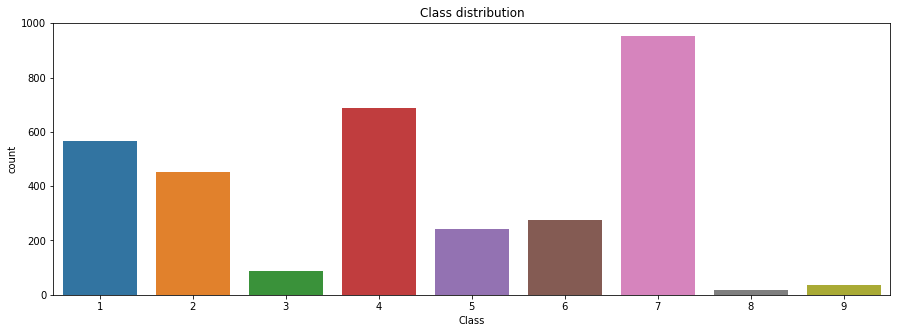

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(x = train_variant["Class"])
plt.title("Class distribution")
plt.show()

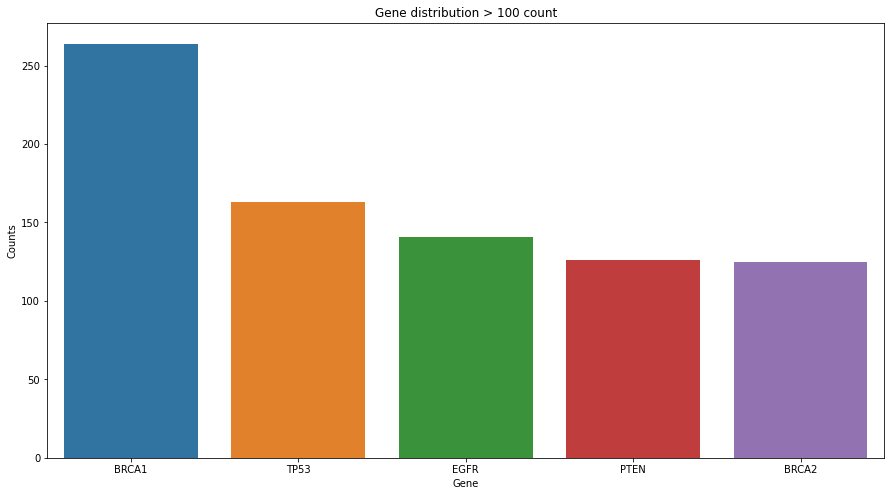

In [10]:
plt.figure(figsize=(15,8))

sns.barplot( x = list(gene_count.keys()), y = list(gene_count.values()))
plt.title("Gene distribution > 100 count")
plt.ylabel("Counts")
plt.xlabel("Gene")

plt.show()

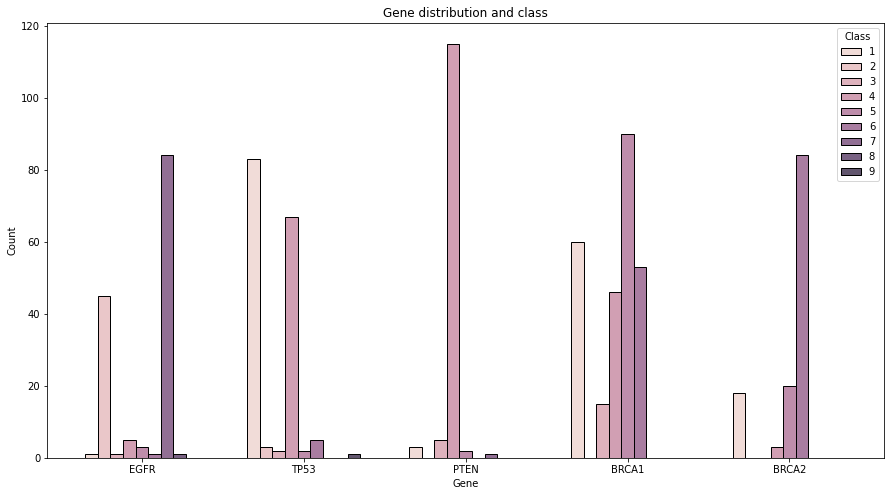

In [11]:
plt.figure(figsize=(15,8))
sns.histplot(data=train_variant[train_variant["Gene"].isin(gene_count.keys())],
             x="Gene", hue="Class", multiple="dodge", shrink=.7)
plt.title("Gene distribution and class")
plt.show()

In [12]:
train_variant.head(5)

,Gene,Variation,Class
ID,,,
0,FAM58A,Truncating Mutations,1
1,CBL,W802*,2
2,CBL,Q249E,2
3,CBL,N454D,3
4,CBL,L399V,4


In [200]:
train_variant[train_variant["Gene"] == "RAD51"]

,Gene,Variation,Class
ID,,,


In [13]:
train_text.head(5)

,Text
ID,
0,Cyclin-dependent kinases (CDKs) regulate a var...
1,Abstract Background Non-small cell lung canc...
2,Abstract Background Non-small cell lung canc...
3,Recent evidence has demonstrated that acquired...
4,Oncogenic mutations in the monomeric Casitas B...


In [41]:
amino_acid_dict = {'C' : 'CYS', 'D' : 'ASP', 'S' : 'SER', 'Q' : 'GLN', 'K' : 'LYS',
    'I' : 'ILE', 'P' : 'PRO', 'T' : 'THR', 'F' : 'PHE', 'N' : 'ASN', 
    'G' : 'GLY', 'H' : 'HIS', 'L' : 'LEU', 'R' : 'ARG', 'W' : 'TRP', 
    'A' : 'ALA', 'V' : 'VAL', 'E' : 'GLU', 'Y' : 'TYR', 'M' : 'MET'}

# Fonction pour la selection

## clean_text
Nettoie l'article, lower puis enlève les points qui pourrait nuire à la detection des phrases, (comme les "...", ou "fig.A")


## find_match
Va détecter la phrase qui contient le mot, puis prend 1 phrase avant et après (au total 3 phrase) (voir diapo)

In [404]:
def amino_three(amino):
    return amino_acid_dict[amino]
    
def decompose_variation(variation):
    decompose_aa_pos_aa = re.compile("([a-z]{1,})(\d+)([a-z]{1,})")
    list_variation = decompose_aa_pos_aa.search(variation)
    if list_variation:
        aa1 = list_variation.group(1)
        aa2 = list_variation.group(3)

        if len(aa1) + len(aa2) == 2:
            amino1 = amino_acid_dict[aa1.upper()].lower()
            position = list_variation.group(2)
            amino2 = amino_acid_dict[aa2.upper()].lower()
            return [amino1,position,amino2]
    return False

def decompose_fusion(variation):
    decompose_g1_g2_fusion = re.compile("(\w+)\s?(\?|-)\s?(\w+)\? fusion")
    list_variation = decompose_g1_g2_fusion.search(variation)
    if list_variation:
        gene1 = list_variation.group(1)
        gene2 = list_variation.group(3)
        print(gene1,gene2,variation, list_variation.group(0))
        return "(" + gene1 + "|" + gene2 + ")"
    return False
        
    

In [142]:
concatenate_data["Variation"].apply(lambda x: print(x,decompose_variation(x.lower())))

Truncating Mutations None
W802* None
Q249E ['gln', '249', 'glu']
N454D ['asn', '454', 'asp']
L399V ['leu', '399', 'val']
V391I ['val', '391', 'ile']
V430M ['val', '430', 'met']
Deletion None
Y371H ['tyr', '371', 'his']
C384R ['cys', '384', 'arg']
P395A ['pro', '395', 'ala']
K382E ['lys', '382', 'glu']
R420Q ['arg', '420', 'gln']
C381A ['cys', '381', 'ala']
P428L ['pro', '428', 'leu']
D390Y ['asp', '390', 'tyr']
Truncating Mutations None
Q367P ['gln', '367', 'pro']
M374V ['met', '374', 'val']
Y371S ['tyr', '371', 'ser']
H94Y ['his', '94', 'tyr']
C396R ['cys', '396', 'arg']
G375P ['gly', '375', 'pro']
S376F ['ser', '376', 'phe']
P417A ['pro', '417', 'ala']
H398Y ['his', '398', 'tyr']
S2G ['ser', '2', 'gly']
Y846C ['tyr', '846', 'cys']
C228T ['cys', '228', 'thr']
H412Y ['his', '412', 'tyr']
H876Q ['his', '876', 'gln']
Promoter Mutations None
P704S ['pro', '704', 'ser']
Amplification None
C250T ['cys', '250', 'thr']
G1809R ['gly', '1809', 'arg']
G1809K ['gly', '1809', 'lys']
D1709E ['asp',

L410R ['leu', '410', 'arg']
V299G ['val', '299', 'gly']
H1620R ['his', '1620', 'arg']
Truncating Mutations None
L1584R ['leu', '1584', 'arg']
Q1554H ['gln', '1554', 'his']
T1623I ['thr', '1623', 'ile']
H597Y ['his', '597', 'tyr']
E1552del None
T1203K ['thr', '1203', 'lys']
V1673F ['val', '1673', 'phe']
V705M ['val', '705', 'met']
P1675L ['pro', '1675', 'leu']
G1596V ['gly', '1596', 'val']
R905W ['arg', '905', 'trp']
R905Q ['arg', '905', 'gln']
V1673D ['val', '1673', 'asp']
R611W ['arg', '611', 'trp']
L830R ['leu', '830', 'arg']
S1653P ['ser', '1653', 'pro']
R905G ['arg', '905', 'gly']
S1653F ['ser', '1653', 'phe']
V769E ['val', '769', 'glu']
Q1503P ['gln', '1503', 'pro']
Deletion None
A889P ['ala', '889', 'pro']
W1610G ['trp', '1610', 'gly']
R462C ['arg', '462', 'cys']
R1200W ['arg', '1200', 'trp']
L792R ['leu', '792', 'arg']
L493V ['leu', '493', 'val']
L493P ['leu', '493', 'pro']
C696Y ['cys', '696', 'tyr']
L826P ['leu', '826', 'pro']
A614D ['ala', '614', 'asp']
L146R ['leu', '146', '

S222D ['ser', '222', 'asp']
D67N ['asp', '67', 'asn']
S226D ['ser', '226', 'asp']
F57V ['phe', '57', 'val']
F57L ['phe', '57', 'leu']
K101M ['lys', '101', 'met']
L46F ['leu', '46', 'phe']
N126D ['asn', '126', 'asp']
C125S ['cys', '125', 'ser']
F57C ['phe', '57', 'cys']
S222D ['ser', '222', 'asp']
E207K ['glu', '207', 'lys']
V35M ['val', '35', 'met']
Truncating Mutations None
T244_I245insCPT None
M269R ['met', '269', 'arg']
R552S ['arg', '552', 'ser']
R552G ['arg', '552', 'gly']
G434R ['gly', '434', 'arg']
E846K ['glu', '846', 'lys']
N233Y ['asn', '233', 'tyr']
T73I ['thr', '73', 'ile']
PVT1-MYC Fusion None
IGL-MYC Fusion None
MYC-nick None
Fusions None
IGH-MYC Fusion None
IGK-MYC Fusion None
Amplification None
Amplification None
P44L ['pro', '44', 'leu']
F12L ['phe', '12', 'leu']
Truncating Mutations None
K398A ['lys', '398', 'ala']
L142P ['leu', '142', 'pro']
H65Y ['his', '65', 'tyr']
A19V ['ala', '19', 'val']
P70R ['pro', '70', 'arg']
D1384V ['asp', '1384', 'val']
Deletion None
R1262

E839K ['glu', '839', 'lys']
K642E ['lys', '642', 'glu']
K550_K558del None
P577_D579del None
N822H ['asn', '822', 'his']
Y578C ['tyr', '578', 'cys']
Y553_K558del None
C809G ['cys', '809', 'gly']
P551_E554del None
T417_D419delinsRG None
T417_D419delinsI None
H697Y ['his', '697', 'tyr']
N655K ['asn', '655', 'lys']
D816Y ['asp', '816', 'tyr']
F522C ['phe', '522', 'cys']
C443Y ['cys', '443', 'tyr']
K558delinsNP None
W557R ['trp', '557', 'arg']
V559C ['val', '559', 'cys']
Y553_Q556del None
M541L ['met', '541', 'leu']
P577_W582delinsPYD None
D820G ['asp', '820', 'gly']
E554_K558del None
P551_V555del None
S501_A502dup None
D419del None
Amplification None
T574_R588delinsL None
V559_V560del None
M552_K558del None
K509I ['lys', '509', 'ile']
W557G ['trp', '557', 'gly']
L576P ['leu', '576', 'pro']
A504_Y505ins None
V559del None
V559D ['val', '559', 'asp']
D816V ['asp', '816', 'val']
Q556_K558del None
P551_W557delinsL None
Exon 11 mutations None
V560G ['val', '560', 'gly']
D814V ['asp', '814', 'val

ID
0       None
1       None
2       None
3       None
4       None
        ... 
3316    None
3317    None
3318    None
3319    None
3320    None
Name: Variation, Length: 3316, dtype: object

In [606]:
def clean_text(article):
    dot3 = re.compile("[.]{2,}")
    fig = re.compile("fig[s]?\.")
    decimal = re.compile("\d+\.\d+")    
    etal = re.compile("et al\.")
    ie = re.compile("i.e.")
    inc = re.compile("inc.")
    mutation_point = re.compile("[p|c]\.")
    
    clean_article = article.lower()
    clean_article = dot3.sub(".", clean_article)
    clean_article = fig.sub("", clean_article)
    clean_article = decimal.sub("", clean_article)
    clean_article = etal.sub("", clean_article)
    clean_article = ie.sub("", clean_article)    
    clean_article = inc.sub("", clean_article)    
    clean_article = mutation_point.sub("", clean_article)    
    
    
    return clean_article

def join_tuple_string(strings_tuple):
    return ' '.join(strings_tuple)

def find_match(text, word):
    clean = clean_text(text)
    word = word.lower()
    target_sentence = "([^.]*{}[^.]*\.)".format(word)
    before_after_target = "([^.]*\.){0,1}"    
    match_exp = re.compile(before_after_target + target_sentence + before_after_target)
    match_text = match_exp.findall(clean)
    final_match = "".join(list(map(join_tuple_string, match_text)))
    return final_match

def extract_match(line):
    # Mettre celui qui consomme le moins en 1er --> ceux qui sont facile à faire sans trop de calcul !
    # 1er : best match
    # 2e ?
    
    
    # Cleaning text     
    text = clean_text(line["Text"])
    variation = line["Variation"].lower()
    gene = line["Gene"].lower()
    
    # Try first match with inital variation value
    # Quality score = 1 
    initial_match = find_match(text, variation)    
    if len(initial_match) != 0:
        print("First match ! ", variation)
        return initial_match, 1
    

    # Fusion of two genes
    # Quality score = 2
    if "fusion" in variation:
        fusion_gene = decompose_fusion(variation)
        if fusion_gene:
            match_fusion_gene = find_match(text, fusion_gene)
            if len(match_fusion_gene) != 0:
                print("Fusion gene1 | gene2", variation)
                return match_fusion_gene, 2

        # Try to match the word fusion at least..
        # Quality score 4 (bad)
        match_fusion = find_match(text,"fusion")
        if len(match_fusion) != 0:
            print("FUSION", variation)
            return match_fusion, 4
        
    aa_pos_aa = decompose_variation(variation)
    if aa_pos_aa :
        if len(aa_pos_aa) == 3:
            # If we success to split variation in 3 group --> aa1 pos aa2
            # Second try without the last amino acid --> y371
            match_variation_aa_pos = find_match(text, variation[:-1])
            if len(match_variation_aa_pos) != 0:
                print("y371 aa_pos", variation)
                
                return match_variation_aa_pos, 2

            # Third try with 3 letter code of amino acid --> tyr371ser
            match_aa_pos_aa = find_match(text, "".join(aa_pos_aa))
            if len(match_aa_pos_aa) != 0:
                print("aa_pos_aa", variation)
                return match_aa_pos_aa, 1
            
            # Try with 3 letter code without the last aa --> tyr371
            match_aa_pos = find_match(text, aa_pos_aa[0] + aa_pos_aa[1])
            if len(match_aa_pos) != 0:
                print("aa_pos", variation)
                
                return match_aa_pos,2
            
            # Match position only --> 371
            match_pos = find_match(text, aa_pos_aa[1])
            if len(match_pos) != 0:
                print("pos", variation)
                
                return match_pos,4
            
            # Match position around the real position --> 370 - 379
            match_pos_weak = find_match(text, aa_pos_aa[1][:-1] + "[0-9]")
            if len(match_pos_weak) != 0:
                print("pos weak", variation)
                
                return match_pos_weak,5
            
            
            
    return [],0



In [388]:
a = "165"
a[:-1] + "[0-9]"


'16[0-9]'

In [148]:
extract_match(concatenate_data.loc[19,:])

" transformed nih3t3 cells showed pi3 kinase-dependent activation of akt and the transformed phenotype was reverted by treatment with the pi3 kinase inhibitor ly294002 (supplementary  9).  when introduced into lin-\u2009sca1+\u2009c-kit+ (lsk) hspcs, c-cbl mutants (c-cbl(gln367pro) and c-cbl(tyr371ser)), as well as a mouse lymphoma-der oncogenic mutant (c-cbl(70z)), significantly promoted the replating capacity of these progenitors ( 2a).  because c-cbl negaty modulates tyroskinase signalling, and all c-cbl mutations, uding those previously reported13, 14, 15, 16, affected the critical domains for its enzymatic activity involved in this modulation, c-cbl was postulated to have a tumour suppressor function; loss-of-function could be a mechanism for the oncogenicity of these c-cbl mutants3, 5. if you requassistance to access this image, or to obtain a text description, please contact npg@nature. com a, prolonged replating capacity of lsk cells transduced with mutant c-cbl (c-cbl(gln367pr

# Exemple à la main juste pour tester

In [15]:
word_to_search = "FAM58A"

In [16]:
article = train_text.loc[0].values[0]

In [17]:
article.count(word_to_search)

34

In [498]:
pd.DataFrame([["klkmklm",1],['kk',2],["ar",5]])

,0,1
0,klkmklm,1
1,kk,2
2,ar,5


In [32]:
clean_match = find_match(article, word_to_search)

In [33]:
print("Before selection : total lenght {} and {} occurences of the word {}".format(
    len(article),article.count(word_to_search) , word_to_search))

print("After selection :  total lenght {} and {} occurences of the word {}".format(
    len(clean_match),clean_match.count(word_to_search.lower()), word_to_search))

Before selection : total lenght 39672 and 34 occurences of the word FAM58A
After selection :  total lenght 9214 and 34 occurences of the word FAM58A


In [185]:
concatenate_data = pd.merge(train_variant, train_text, on="ID").dropna()
concatenate_data

,Gene,Variation,Class,Text
ID,,,,
0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...
...,...,...,...,...
3316,RUNX1,D171N,4,Introduction Myelodysplastic syndromes (MDS) ...
3317,RUNX1,A122*,1,Introduction Myelodysplastic syndromes (MDS) ...
3318,RUNX1,Fusions,1,The Runt-related transcription factor 1 gene (...


In [ ]:
clean_match_data = concatenate_data.apply(lambda x: extract_match(x), axis = 1)
clean_match = pd.DataFrame(list(clean_match_data), columns = ["Text","Score"])

First match !  w802*
First match !  q249e
First match !  n454d
First match !  l399v
First match !  v391i
First match !  v430m
First match !  deletion
First match !  y371h
First match !  c384r
First match !  p395a
First match !  k382e
First match !  r420q
First match !  c381a
First match !  p428l
First match !  d390y
First match !  q367p
First match !  m374v
aa_pos_aa y371s
First match !  h94y
First match !  c396r
First match !  g375p
First match !  s376f
First match !  p417a
First match !  h398y
First match !  s2g
First match !  y846c
First match !  c228t
First match !  h412y
First match !  h876q
First match !  promoter mutations
First match !  p704s
First match !  amplification
First match !  c250t
First match !  g1809r
First match !  g1809k
First match !  d1709e
First match !  d1709a
First match !  e1705a
First match !  d1810a
First match !  truncating mutations
First match !  e1705k
First match !  deletion
pos weak t1365m
First match !  v648g
First match !  a707t
First match !  prom

First match !  p278a
First match !  r249m
First match !  f341c
First match !  k292t
First match !  g266r
First match !  h179r
pos c141y
First match !  v143a
pos weak e326l
First match !  c229r
First match !  k291q
First match !  q144r
First match !  r248q
First match !  p250l
First match !  a347t
First match !  v157f
pos i251s
First match !  f134y
First match !  p152l
pos g199r
First match !  i162m
First match !  c135r
First match !  a161s
First match !  g334r
First match !  v173l
First match !  r158l
First match !  h193n
First match !  r175l
pos p47s
First match !  r280a
First match !  r280t
First match !  k292i
First match !  y236c
y371 aa_pos r248l
First match !  r156c
pos y236d
pos t150i
First match !  l344p
First match !  h233n
First match !  p278l
First match !  k291e
First match !  e258v
pos weak s241y
First match !  c238f
First match !  f212y
First match !  r282w
First match !  r267p
First match !  h214q
First match !  t123a
First match !  s215c
First match !  r282q
First match

pos weak i834v
First match !  g853d
First match !  d842v
First match !  t674i
First match !  p577s
First match !  amplification
First match !  w349c
First match !  d846y
First match !  n848k
First match !  l507p
First match !  n659s
First match !  v561d
First match !  strn-pdgfra fusion
First match !  d842y
First match !  y849c
First match !  bcr-pdgfra fusion
First match !  etv6-pdgfra fusion
First match !  v658a
First match !  f808l
FUSION kank1-pdgfrb fusion
First match !  r987w
FUSION nin-pdgfrb fusion
First match !  gpiap1-pdgfrb fusion
First match !  golga4-pdgfrb fusion
FUSION wdr48-pdgfrb fusion
First match !  tp53bp1-pdgfrb fusion
First match !  fusions
First match !  prkg2-pdgfrb fusion
First match !  ebf1-pdgfrb fusion
FUSION atf7ip-pdgfrb fusion
First match !  amplification
y371 aa_pos e1071w
First match !  pde4dip-pdgfrb fusion
First match !  bin2-pdgfrb fusion
aa_pos_aa r561c
FUSION cep85l-pdgfrb fusion
First match !  git2-pdgfrb fusion
FUSION sptbn1-pdgfrb fusion
FUSION 

First match !  l362r
First match !  v270a
y371 aa_pos r370c
First match !  l52r
First match !  e49k
First match !  e17k
First match !  q79e
First match !  g311d
First match !  l78t
First match !  q79k
First match !  v271a
First match !  p42t
First match !  k39n
First match !  w80a
First match !  d32y
First match !  t195i
First match !  d325a
First match !  k189n
First match !  n53a
First match !  d323h
First match !  r23a
First match !  l202f
First match !  c77f
First match !  d32h
First match !  k181m
First match !  i289m
First match !  r170w
First match !  r368c
First match !  g161v
First match !  fusions
y371 aa_pos h355m
First match !  amplification
First match !  e17k
First match !  d399n
FUSION fgfr1op1-fgfr1 fusion
First match !  a263v
First match !  cep110-fgfr1 fusion
First match !  znf198-fgfr1 fusion
First match !  e664k
First match !  amplification
FUSION fgfr1-tacc1 fusion
First match !  k656e
First match !  fusions
First match !  bcr-fgfr1 fusion
FUSION erlin2?fgfr1 fusio

pos weak l702h
First match !  p380r
First match !  q58l
First match !  arv567es
First match !  a159t
First match !  t878a
pos weak h875y
First match !  g216r
pos weak w742l
pos weak w742c
pos weak t878s
First match !  amplification
First match !  f876l
First match !  l272f
First match !  q120e
pos f877l
First match !  g248v
First match !  ar-v7
First match !  n217i
First match !  s214a
y371 aa_pos s214t
First match !  q347_a348del
First match !  f351l
First match !  s214c
First match !  g322s
First match !  t37a
First match !  g17v
aa_pos_aa g17e
aa_pos_aa g14v
First match !  e40q
aa_pos_aa l57v
First match !  r5q
First match !  t19n
First match !  y42c
First match !  e40t
First match !  overexpression
First match !  e40l
First match !  g17a
First match !  y34c
First match !  e40w
First match !  e40n
First match !  w257g
y371 aa_pos s256w
pos p179r
aa_pos r183p
First match !  r182w
pos r258h
First match !  s256f
pos r258c
pos p179l
aa_pos r183g
y371 aa_pos w257c
aa_pos r183q
First matc

First match !  r130g
First match !  h93q
First match !  a126d
First match !  g251c
First match !  f241s
First match !  i168f
First match !  p95l
First match !  d92e
First match !  k125l
First match !  c124r
First match !  l23f
First match !  d162g
First match !  g129e
First match !  k128n
First match !  k289e
First match !  i122v
First match !  y68d
First match !  v343e
First match !  r159g
First match !  t131i
First match !  f21a
First match !  r130l
First match !  h123q
First match !  v369g
First match !  g127e
First match !  k342n
First match !  y16c
First match !  d252g
First match !  h61d
First match !  l108p
First match !  r173p
First match !  d331g
First match !  g165v
First match !  k62r
First match !  i122l
First match !  r161g
First match !  t160i
First match !  r130a
First match !  a39p
First match !  d24y
First match !  l345q
First match !  s170n
First match !  k125e
First match !  i122s
First match !  k128t
y371 aa_pos v343l
First match !  y27s
First match !  m134l
First m

pos weak c1787s
First match !  v1810g
First match !  n1236k
First match !  r1699q
First match !  a1789t
First match !  k45q
First match !  d1692n
First match !  i1766s
First match !  l1267s
First match !  e143k
First match !  t1720a
y371 aa_pos l1780p
First match !  i42v
First match !  q12y
First match !  w1718l
pos weak p1856t
pos weak r1751q
First match !  a1752p
First match !  v1653m
pos weak n1730s
First match !  e1644g
First match !  h1686q
First match !  q1826h
First match !  r71g
First match !  s1164i
First match !  v1804d
First match !  s1301r
First match !  c44f
First match !  v191d
pos q1756c
First match !  r841q
First match !  m1652k
pos weak r1751p
First match !  c47g
First match !  c360r
First match !  s1715n
y371 aa_pos k50e
y371 aa_pos a1708v
First match !  e1250k
First match !  s1613c
First match !  l668f
First match !  p1614s
First match !  a1843p
First match !  c39s
First match !  p1812r
First match !  v1378i
pos weak p1771r
First match !  t1685i
pos weak t1691k
First

In [507]:
clean_match

,Text,Score
0,"here, we deorphancdk10 by tifying cyclin m, th...",3
1,the c-cbl loh also posity correlated with egf...,1
2,the c-cbl loh also posity correlated with egf...,1
3,"most of the changes were novel, although 4 ca...",1
4,all mutations from the second group were pred...,1
...,...,...
3311,21⇓⇓⇓⇓⇓⇓⇓–29 the vast majority of aml1 mutatio...,1
3312,21⇓⇓⇓⇓⇓⇓⇓–29 the vast majority of aml1 mutatio...,3
3313,lpxn is preferentially expressed in hematopoi...,1
3314,") conversely, mutations mapping to the first d...",1


# Explications du problème
Fonction poubelle juste pour voir ceux qui sont pas détectable --> len(match) == 0

Si ils sont pas détectable, c'est que le nom donné pour leurs variation sont pas dans l'article, donc je vérfie à la main sur le site https://regex101.com/r/lvQZIf/1 qui sert à visualiser les expressions régulières.
En copiant collant tout l'article, je regarde comment je peux détecter la variation avec un autre nom ducoup, comme le nom de base ne marche pas.

Par exemple Id = 19, y371s n'est pas dans l'article mais il y est sous la forme tyr371ser.

Cet regexpr ne marche pas (le texte est en minuscule) -> `([^.]*\.){0,1}([^.]*y371s[^.]*\.)([^.]*\.){0,2}`

Mais celle la marchera -> `([^.]*\.){0,1}([^.]*tyr371ser[^.]*\.)([^.]*\.){0,2}` (ça donne 3 match sur le site pour l'article id = 19)

(pour les regex, il faut juste changer le nom au milieu après `*` et avant `[^.]`)

Autre exemple, ID = 102, mutation r922* qui n'est mentionné sous aucunes formes, ni même la position 922. Mais, il y a des mots qui peuvent faire penser à cette mutation du genre "nonsense mutations" car l'étoile (\*) veut dire que r922 est devenu un codon stop, donc c'est une mutation non sens. Faudrait voir si je peux convertir ces mutations en mot pour faciliter la détection, ou utiliser un champ lexical.


Donc là, j'essaie de faire plus ou moins au cas par cas (pas tous, y en a 880...) pour déterminer des groupes de variations indétectable pour revoir la détection.
Par exemple, pour les variations de type `y371s`, je peux prendre `y371`, ou tout simplement `371` qui peuvent détecter la variation dans certain cas.


Par contre, pour ceux où y a vraiment pas d'infos dans l'article avec la variation, du genre `t1365m` ID = 44; je sais pas quoi faire d'eux :)
Car la position 1365 n'est même pas mentionné dans l'article, donc je vois pas comment détecter les infos liées à cette mutation...

Soit je garde l'article entier, soit je prend le nom du gène pour la détection, mais le pb avec ça, c'est que ducoup tout ceux qui sont indétectables de ce gène là, auront les mêmes lignes de détecté car je détecterai uniquement en utilisant le nom du gène, donc y aura pas de différences entre eux même si la variation diffère.




## Ne lance pas la cellule juste en bas, ça prend un certain temps et de toute façon, tu as déjà la sortie avec tout ceux qui ne marchent pas.

La sortie est de la forme : 
`variation | id | len(article_original) | len(match)`

Certaines variations sont des mots complets du genre `truncating mutations`, un peu relou pour la détection, ce qu'on pourrait faire, c'est utiliser des mots qui ressemble à truncating grace à des méthodes de traitements de texte qui va prendre que le préfix par exemple et automatiser ça pour les mots

In [ ]:
def check_line(x):
    extract = extract_match(x)
    score = extract[1]
    if score == 0:
        print(x["Variation"].lower(), x.name, len(x["Text"]))

        
concatenate_data.apply(lambda x : check_line(x) , axis = 1)

# Variable ID pour faciliter le print des deux cellules suivantes pour choper le text, la variation et le gene d'un ID et les copier coller sur le site regex

Pour la détection, je teste juste avec le nom de la variation, puis vraiment si y a rien, je regarde du coté du nom du gène

In [553]:
ID = 3311

In [555]:
concatenate_data.loc[ID,"Text"].lower()

"the aml1/evi-1 chimeric gene is generated by the t(3;21)(q26;q22) translocation and plays a pivotal role in progression of hematopoietic stem cell malignancies such as chronic myelocytic leukemia and myelodysplastic syndrome. in aml1/evi-1, an n-terminal half of aml1 including a runt homology domain is fused to the entire zinc-finger evi-1 protein. aml1 is essential for hematopoietic cell development in fetal liver and its lineage-specific differentiation in adult. in contrast, evi-1 is barely expressed in normal hematopoietic cells, but it is overexpressed in chronic myelocytic leukemia in blastic crisis and myelodysplastic syndrome-derived leukemia. there are at least four mechanisms identified in aml1/evi-1 fusion protein that possibly lead into malignant transformation of hematopoietic stem cells. firstly, aml1/evi-1 exerts dominant-negative effects over aml1-induced transcriptional activation. although target genes repressed by aml1/evi-1 are still not known, binding competition 

In [554]:
print(concatenate_data.loc[ID,"Variation"].lower(),
concatenate_data.loc[ID,"Gene"].lower())

runx1-evi1 fusion runx1


In [252]:
import numpy as np
CBL = train_variant[train_variant["Gene"] == "RUNX1"]
article_cbl = train_text.loc[CBL.index,]

CBL.to_csv("cbl.txt")
dtf = pd.merge(pd.DataFrame(clean_article_CBL.index), clean_article_CBL, on ="ID")
np.savetxt("cbl_clean_article.txt",dtf, fmt = "%d||%s", header= ",".join(dtf.columns), comments='')

In [534]:
new_data = pd.merge(train_variant,clean_match, on = "ID")

In [552]:
new_data[new_data["Score"] == 1]

,Gene,Variation,Class,Text,Score
ID,,,,,
1,CBL,W802*,2,the c-cbl loh also posity correlated with egf...,1
2,CBL,Q249E,2,the c-cbl loh also posity correlated with egf...,1
3,CBL,N454D,3,"most of the changes were novel, although 4 ca...",1
4,CBL,L399V,4,all mutations from the second group were pred...,1
5,CBL,V391I,4,all mutations from the second group were pred...,1
...,...,...,...,...,...
3310,RUNX1,Amplification,7,this truncated protein conta the rhd but not ...,1
3311,RUNX1,RUNX1-EVI1 Fusion,4,21⇓⇓⇓⇓⇓⇓⇓–29 the vast majority of aml1 mutatio...,1
3313,RUNX1,H78Q,4,lpxn is preferentially expressed in hematopoi...,1


In [588]:
count = new_data[new_data["Score"] == 1].apply(lambda line: check_line(line), axis = 1)

truncating mutations 1110 0
deletion 1113 0
l274p 1114 0
w183a 1115 0
x1007_splice 1118 0
v1188l 1121 0
f1200i 1122 0
v1092i 1124 0
y1003f 1126 0
x963_splice 1129 0
x1009_splice 1132 0
overexpression 1133 0
y1003* 1134 0
h1094l 1136 0
m1250t 1142 0
h1106d 1144 0
y1230h 1145 0
n1100y 1149 0
s3660l 1154 0
truncating mutations 1156 0
truncating mutations 1163 0
i31m 1165 0
m1043i 1170 0
g106v 1172 0
d350g 1173 0
e545q 1174 0
n1068fs*4 1177 0
n1044k 1179 0
t1025s 1182 0
q60k 1185 0
e545k 1187 0
e365k 1188 0
e81k 1189 0
h701p 1193 0
p449_l455del 1199 0
p449t 1201 0
a1020v 1203 0
q546r 1206 0
e579k 1207 0
d1029y 1208 0
g106_r108del 1210 0
e453a 1214 0
c378r 1215 0
i391m 1217 0
fusions 1224 0
d1067y 1226 0
e1051k 1228 0
d1067a 1229 0
y53h 1236 0
p123m 1237 0
fusions 1241 0
amplification 1242 0
yap1-fam118b fusion 1244 0
e218* 1249 0
i559_d560insdkrmns 1251 0
n564d 1252 0
w237_y242del 1253 0
x582_splice 1257 0
k459_s460delinsn 1262 0
r348* 1265 0
r262t 1266 0
e439del 1268 0
k376n 1270 0
amplif

p1859r 2547 0
d1778n 2553 0
w1837r 2556 0
v1833e 2557 0
p1806a 2558 0
d1733g 2568 0
s1297del 2571 0
l1764p 2574 0
g1770v 2576 0
a1752v 2577 0
g1763v 2579 0
d1739y 2582 0
e1660g 2583 0
s1715r 2584 0
m1628v 2586 0
v1838e 2592 0
g1738e 2595 0
v1809f 2598 0
m1008i 2602 0
e1282v 2603 0
e1214k 2604 0
v1665m 2605 0
r1589h 2608 0
n1819s 2610 0
v1808a 2611 0
p1771l 2616 0
r1758g 2624 0
l1267s 2628 0
e143k 2629 0
t1720a 2630 0
q1826h 2643 0
s1164i 2645 0
q1756c 2650 0
r841q 2651 0
m1663k 2656 0
s1715n 2657 0
e1250k 2660 0
s1613c 2661 0
l668f 2662 0
p1614s 2663 0
v1378i 2667 0
t1685i 2669 0
s1473p 2673 0
e1346k 2675 0
r133h 2676 0
a1843t 2677 0
d1778g 2678 0
t599_v600insv 2685 0
l485f 2686 0
l485_p490del 2687 0
l485_p490delinsf 2688 0
a598v 2689 0
i326v 2690 0
q201h 2691 0
a246p 2693 0
g596v 2694 0
v600r 2695 0
v471f 2696 0
t529m 2697 0
g478c 2699 0
t529i 2702 0
k483e 2706 0
r506_k507insvlr 2707 0
r671q 2711 0
v487_p492delinsa 2716 0
p61braf 2718 0
agk-braf fusion 2720 0
t599dup 2721 0
s151a 2722

In [578]:
index_hacker = count[count == 0].index
index_hacker

Int64Index([ 290,  677,  697,  748,  946,  953,  966,  970, 1074, 1109,
            ...
            3303, 3304, 3305, 3306, 3308, 3310, 3311, 3313, 3314, 3315],
           dtype='int64', name='ID', length=1445)

In [584]:
concatenate_data.loc[290,"Text"].lower()

"follicular lymphoma, the most common indolent non-hodgkin lymphoma, remains a significant clinical burden, as the majority of affected individuals undergo multiple relapses and eventually develop resistance to standard therapies. furthermore, in a subset of individuals, follicular lymphoma transforms into the more aggressive diffuse large b cell lymphoma (dlbcl), with this transformation associated with poor clinical outcomes2, 3, 4. recent genetic profiling and case studies of donor-derived follicular lymphoma following stem cell transplantation suggest the putative existence of a 'long-lived' tumor-initiating progenitor cell compartment from which successive disease events occur5, 6, 7, 8. an in-depth characterization and chronicling of the underlying genetic events from follicular lymphoma to transformed follicular lymphoma will serve as a guide in the development of effective targeted therapies. to address this need, we conducted whole-genome or whole-exome sequencing of sequentia

In [581]:
new_data.loc[290,]

Gene                                                  HIST1H1C
Variation                                                S102F
Class                                                        1
Text          most of the histone h1 alterations were misse...
Score                                                        1
Name: 290, dtype: object